# Causal programming prototype

## Dependencies

In [2]:
(require '[acausal.core
                   ;; Core functions
           :refer [model query data identify
                   ;; Visualization functions (need to refactor)
                   model->svg query->latex data->latex]])

## Model

Let $X$ be smoking, $Y$ be cancer, and $Z$ be tar on lungs.

Assume that the effect of smoking on caner is mediated by tar. However, there may be a latent factor that affects both smoking and cancer. These assumptions can be summarized in the following model:

$$ X = f_X(\epsilon_X) $$
$$ Z = f_Z(x, \epsilon_Z) $$
$$ Y = f_Y(z, \epsilon_Y) $$
$$ \epsilon_X \not\bot\!\!\bot \epsilon_Y$$

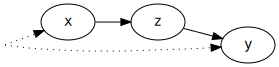

In [6]:
(def m
    (model
        {:x []
         :z [:x]
         :y [:z]}
        #{:x :y}))

(model->svg m)

## Query

A query is (usually) a causal effect computation that we are interested in, e.g. $P(y \mid do(x))$

In [7]:
(def q
    (query [:y] :do [:x]))

(query->latex q)

## Data

Data (previously called 'information set') is the population probabilities available that could be used to compute the query of interest. By default, it's assumed that the joint observational probability distribution is available, i.e. $P(v)$; in this example, this would be $P(x, y, z)$

In some scenarios, limited experimental data may also be available.

In [8]:
(def d
    (data [:x :y :z]))

(data->latex d)

## Identification

Calculate the query, with respect to the model assumptions, from the available data.

This doesn't work yet, but here's a dummy function call:

In [9]:
(identify m q d)

## First-class objects

Models, information sets, queries and formulas are all *first-class objects*; they can be manipulated like any other data structure by the functions available in the host language (Clojure). Here's another example model:

$$w = f_w(\epsilon_w)$$
$$x = f_x(\epsilon_x)$$
$$y = f_y(z, \epsilon_y)$$
$$z = f_z(w, x, \epsilon_z)$$

$$\epsilon_w \not ⫫ \epsilon_z$$
$$\epsilon_x \not ⫫ \epsilon_y$$

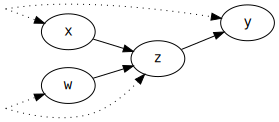

In [10]:
(def example
    (model
        {:w []
         :x []
         :y [:z]
         :z [:w :x]}
        #{:w :z}
        #{:x :y}))

(model->svg example)

In [12]:
(print example)

#acausal.core.Model{:vars #{:y :w :z :x}, :latents #{#{:y :x} #{:w :z}}, :parents {:w #{#{:w :z}}, :x #{#{:y :x}}, :y #{:z #{:y :x}}, :z #{:w :x #{:w :z}}, #{:y :x} #{}, #{:w :z} #{}}, :children {:w #{:z}, :x #{:z}, :y #{}, :z #{:y}, #{:y :x} #{:y :x}, #{:w :z} #{:w :z}}}

In [16]:
(-> example :parents :z)

#{:w :x #{:w :z}}

In [17]:
(-> example :children :w)

#{:z}